# 1. Import and Pre-processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# train test val filenames
trainfile = 'strat_train'
testfile = 'strat_test'
valfile = 'strat_validation'

# train test val datasets
train = pd.read_csv('model_data/'+trainfile+'.csv')
test = pd.read_csv('model_data/'+testfile+'.csv')
val = pd.read_csv('model_data/'+valfile+'.csv')

# main data dataset
user = pd.read_csv('Data/user.csv')
cat = pd.read_csv('Data/cat.csv')
# interaction = pd.read_csv('Data/interaction.csv')

In [3]:
# shape of each dataset
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')
print(f'val shape: {val.shape}')  
print(f'user shape: {user.shape}')
print(f'cat shape: {cat.shape}')
# print(f'interaction shape: {interaction.shape}')      

train shape: (3874, 9)
test shape: (488, 9)
val shape: (479, 9)
user shape: (107, 31)
cat shape: (404, 38)


In [4]:
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,id,catID,userID,like,dwell_time_ms,click,created_at,updated_at
0,2573,553fb8a7-ef42-4a90-9f2f-e4a4cb54aa21,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,2618,False,2023-05-18 17:00:19.489000+00:00,2023-05-18 17:00:19.489000+00:00
1,2503,ae844919-c1ef-45ab-8306-3e21e7a5f783,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,5444,False,2023-05-18 17:00:58.054000+00:00,2023-05-18 17:00:58.054000+00:00
2,3716,22862b20-e6e7-4668-9371-ae2071d4c8f6,93c90dec-7f79-435d-bf3c-d9516cea96e7,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,7502,False,2023-05-18 17:01:34+00:00,2023-05-18 17:01:34+00:00
3,3112,1e4335d1-7f19-4680-8bb6-73095c3d6f8a,80355278-da9b-4f01-9377-8fa82eefcbb5,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,2501,False,2023-05-18 17:00:47.493000+00:00,2023-05-18 17:00:47.493000+00:00
4,2920,2b6e26d5-9fca-4962-b335-90dd9bbc4d39,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,2316,False,2023-05-18 17:01:14.967000+00:00,2023-05-18 17:01:14.967000+00:00


In [5]:
test.head()

,Unnamed: 0,id,catID,userID,like,dwell_time_ms,click,created_at,updated_at
0,17,7783a0b2-02f8-47ea-8651-47b8e872a9dc,f275533f-0bc5-495a-abfa-e193ab062849,1528304d-e070-469a-b476-31f3b1022681,True,8283,True,2023-05-18 06:43:43.854000+00:00,2023-05-18 06:43:43.854000+00:00
1,24,cfa95e08-0219-4407-8c06-a314f4c42035,a60e85ad-1f8e-46c2-b659-ebc27ae94966,64515f3e-a2c6-4f08-8dd7-5e79116f07be,True,7619,True,2023-06-03 09:14:19.870000+00:00,2023-06-03 09:14:19.870000+00:00
2,29,a242b023-24ca-49f7-9489-6da4f22736d0,53f351bf-77ae-4fe7-81da-d0b9300773b1,ab6872c5-4af8-4b92-95e2-b71363b2b82d,False,783,False,2023-06-07 05:09:48.567000+00:00,2023-06-07 05:09:48.567000+00:00
3,33,b1a598fd-3ee3-4e5f-bf6c-4c7a5b5f033d,d06953ad-f7d8-4ce2-8a5d-37ce627958d2,64515f3e-a2c6-4f08-8dd7-5e79116f07be,False,23019,True,2023-05-19 15:59:29.670000+00:00,2023-05-19 15:59:29.670000+00:00
4,34,7a85f8d1-195c-449c-8f55-10a4f92bfb92,66fcc141-e657-4732-99e2-003e577ca7d1,23c9e331-9bb3-4667-9571-f42abf760be6,False,3391,False,2023-05-19 01:32:34.469000+00:00,2023-05-19 01:32:34.469000+00:00


In [6]:
val.head()

,Unnamed: 0,id,catID,userID,like,dwell_time_ms,click,created_at,updated_at
0,1226,f3deeb40-f698-44bf-b65a-f937818920a7,00f490bd-182a-4907-b2f8-ba08617cf3d1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,12559,False,2023-05-18 17:00:12.924000+00:00,2023-05-18 17:00:12.924000+00:00
1,318,11353ac3-e881-45f6-8ebd-3fb5747fc65e,4bc6b512-595c-4429-8cf8-f945107fc9a9,0153cd06-7ebb-41cc-b304-7b4e42c6b965,False,4847,False,2023-05-18 17:01:02.884000+00:00,2023-05-18 17:01:02.884000+00:00
2,3829,fde2f09a-1ce0-4a2b-852b-52d967f4248b,ce290f5f-6b15-4831-98d0-6a003a2a0b04,01abb157-9112-47c6-9ff6-fb603505e341,True,999,True,2023-06-01 12:36:01.044000+00:00,2023-06-01 12:36:01.044000+00:00
3,788,c3ecb65d-b9de-4a3b-a22d-cccc1aaa1457,0076ee93-e587-4b01-b916-56d008f1f233,01abb157-9112-47c6-9ff6-fb603505e341,False,3037,True,2023-06-01 12:35:06.135000+00:00,2023-06-01 12:35:06.135000+00:00
4,4281,306f54e4-1330-48d3-9b31-ef1f18e68172,554577ae-c5a2-414e-9834-e4e0f27efcb9,01abb157-9112-47c6-9ff6-fb603505e341,True,4549,True,2023-06-01 12:36:15.975000+00:00,2023-06-01 12:36:15.975000+00:00


In [7]:
# list of datasets
dfs = [train, test, val]

In [8]:
for i in range(len(dfs)):
    
    # for all
    dfs[i]['like'] = dfs[i]['like'].apply(lambda x: 1 if x else 0)
    
    # train
    if i == 0:
        dfs[i]['click'] = dfs[i]['click'].apply(lambda x: 1 if x else 0)
        dfs[i].drop(['Unnamed: 0', 'id','created_at', 'updated_at'], axis=1, inplace=True)
        dfs[i] = dfs[i][['userID', 'catID', 'like', 'dwell_time_ms', 'click']]
    
    elif i == 1 or i == 2:
        dfs[i].drop(['Unnamed: 0', 'id', 'dwell_time_ms', 'click', 'created_at', 'updated_at'], axis=1, inplace=True)
        dfs[i] = dfs[i][['userID', 'catID', 'like']]
        
train, test, val = dfs[0], dfs[1], dfs[2]

In [9]:
train.head()

,userID,catID,like,dwell_time_ms,click
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0,2618,0
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0,5444,0
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0,7502,0
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0,2501,0
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0,2316,0


In [10]:
train.head(100)

,userID,catID,like,dwell_time_ms,click
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0,2618,0
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0,5444,0
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0,7502,0
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0,2501,0
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0,2316,0
...,...,...,...,...,...
95,079b0ec9-cec6-42fb-9f00-7891c52a10fb,72907ede-9f87-4008-be26-5a06bf50d87b,0,969,0
96,079b0ec9-cec6-42fb-9f00-7891c52a10fb,00f490bd-182a-4907-b2f8-ba08617cf3d1,0,6083,0
97,079b0ec9-cec6-42fb-9f00-7891c52a10fb,7b1632fa-6152-4862-b9d9-3bd9207cf25c,1,1036,0
98,079b0ec9-cec6-42fb-9f00-7891c52a10fb,2b87337b-1179-42c8-b423-c0ec34bb6833,0,1855,0


In [11]:
test.head()

,userID,catID,like
0,1528304d-e070-469a-b476-31f3b1022681,f275533f-0bc5-495a-abfa-e193ab062849,1
1,64515f3e-a2c6-4f08-8dd7-5e79116f07be,a60e85ad-1f8e-46c2-b659-ebc27ae94966,1
2,ab6872c5-4af8-4b92-95e2-b71363b2b82d,53f351bf-77ae-4fe7-81da-d0b9300773b1,0
3,64515f3e-a2c6-4f08-8dd7-5e79116f07be,d06953ad-f7d8-4ce2-8a5d-37ce627958d2,0
4,23c9e331-9bb3-4667-9571-f42abf760be6,66fcc141-e657-4732-99e2-003e577ca7d1,0


In [12]:
val.head()

,userID,catID,like
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,00f490bd-182a-4907-b2f8-ba08617cf3d1,0
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,4bc6b512-595c-4429-8cf8-f945107fc9a9,0
2,01abb157-9112-47c6-9ff6-fb603505e341,ce290f5f-6b15-4831-98d0-6a003a2a0b04,1
3,01abb157-9112-47c6-9ff6-fb603505e341,0076ee93-e587-4b01-b916-56d008f1f233,0
4,01abb157-9112-47c6-9ff6-fb603505e341,554577ae-c5a2-414e-9834-e4e0f27efcb9,1


# 2. Combining Features

## 2a. Outliers in dwell_time_ms

In [13]:
# checking dwell_time_ms in seconds
train['dwell_time_ms'].apply(lambda x: x/1000).describe()

count     3874.000000
mean        15.634579
std        267.710784
min          0.098000
25%          1.012000
50%          1.651000
75%          3.975250
max      10307.422000
Name: dwell_time_ms, dtype: float64

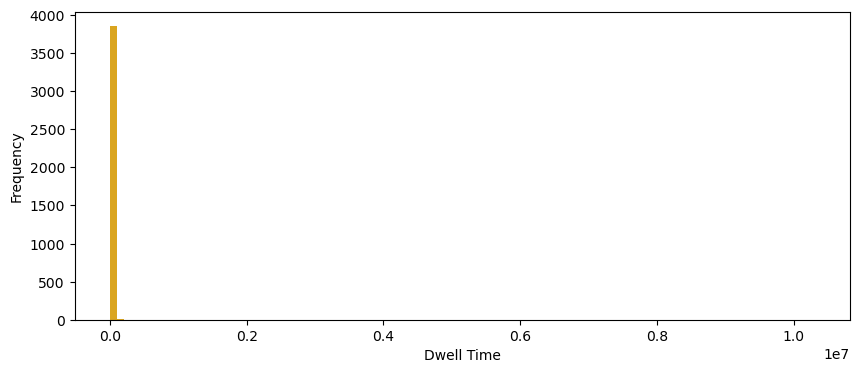

In [14]:
plt.figure(figsize=(10,4))
plt.hist(train['dwell_time_ms'], 
         bins=100, 
         color='goldenrod')
plt.xlabel('Dwell Time')
plt.ylabel('Frequency')
plt.show()

In [15]:
# applying log transformation on dwell time to reduce impact of outliers
train['dwell_time_ms'].apply(lambda x: np.log(x)).describe()

count    3874.000000
mean        7.651504
std         1.238368
min         4.584967
25%         6.919684
50%         7.409136
75%         8.287843
max        16.148375
Name: dwell_time_ms, dtype: float64

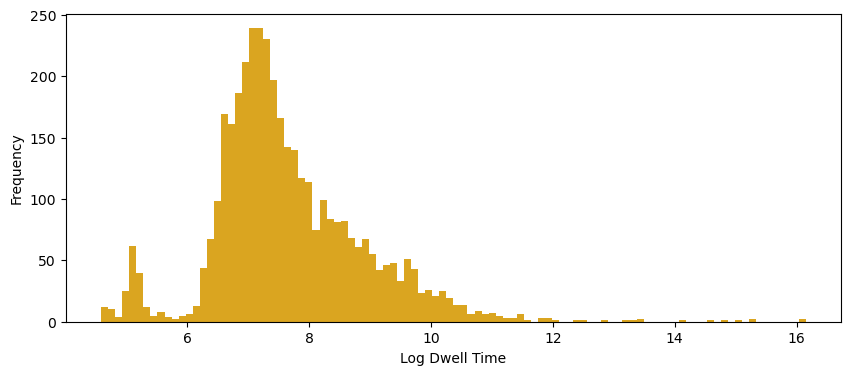

In [16]:
plt.figure(figsize=(10,4))
plt.hist(train['dwell_time_ms'].apply(lambda x: np.log(x)), 
         bins=100,
         color='goldenrod')
plt.xlabel('Log Dwell Time')
plt.ylabel('Frequency')
plt.show()

In [17]:
train['log_dwell_time'] = train['dwell_time_ms'].apply(lambda x: np.log(x))
train.drop(['dwell_time_ms'], axis=1, inplace=True)
train.head()

,userID,catID,like,click,log_dwell_time
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0,0,7.870166
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0,0,8.602269
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0,0,8.922925
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0,0,7.824446
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0,0,7.747597


## 2b. Normalizing log_dwell_time

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
train['norm_log_dwell_time'] = scaler.fit_transform(train[['log_dwell_time']])
train.drop(['log_dwell_time'], axis=1, inplace=True)
train.head()

,userID,catID,like,click,norm_log_dwell_time
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0,0,0.284103
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0,0,0.347415
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0,0,0.375145
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0,0,0.280149
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0,0,0.273503


# 3. Feature Weights

Run code ↓ to adjust weights

In [21]:
train_weighted = train.copy()

In [22]:
# weights L, C, D for like, click, dwell_time
L = 0.5
C = 0.25
D = 0.25

In [23]:
train_weighted['rating'] = L*train_weighted['like'] + C*train_weighted['click'] + D* train_weighted['norm_log_dwell_time']
train_weighted.head()

,userID,catID,like,click,norm_log_dwell_time,rating
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0,0,0.284103,0.071026
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0,0,0.347415,0.086854
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0,0,0.375145,0.093786
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0,0,0.280149,0.070037
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0,0,0.273503,0.068376


In [24]:
train_weighted['rating'].describe()

count    3874.000000
mean        0.411161
std         0.276469
min         0.000219
25%         0.084763
50%         0.356708
75%         0.573740
max         1.000000
Name: rating, dtype: float64

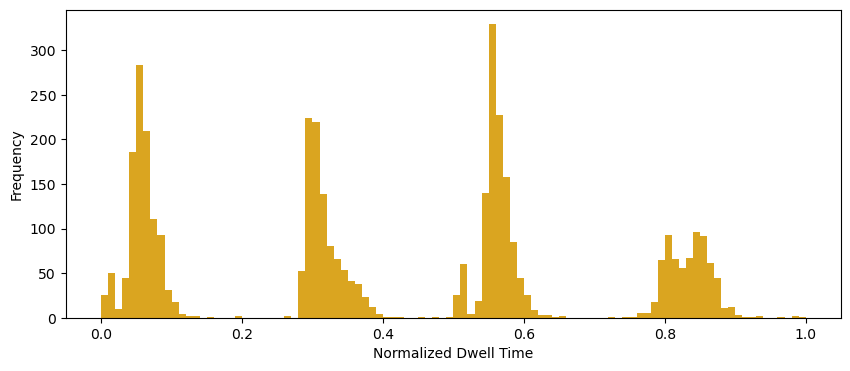

In [25]:
plt.figure(figsize=(10,4))
plt.hist(train_weighted['rating'], 
         bins=100,
         color='goldenrod')
plt.xlabel('Normalized Dwell Time')
plt.ylabel('Frequency')
plt.show()

In [26]:
train_weighted.drop(['like','click','norm_log_dwell_time'], axis=1, inplace=True)
train_weighted.head()

,userID,catID,rating
0,0153cd06-7ebb-41cc-b304-7b4e42c6b965,6b33d102-9497-43c7-a7a3-a28d6a9d1880,0.071026
1,0153cd06-7ebb-41cc-b304-7b4e42c6b965,f4273d9d-a8ff-4812-992d-d8252f8f0eb0,0.086854
2,0153cd06-7ebb-41cc-b304-7b4e42c6b965,93c90dec-7f79-435d-bf3c-d9516cea96e7,0.093786
3,0153cd06-7ebb-41cc-b304-7b4e42c6b965,80355278-da9b-4f01-9377-8fa82eefcbb5,0.070037
4,0153cd06-7ebb-41cc-b304-7b4e42c6b965,b9019372-0e9d-42e1-ae61-9d9c9e1687a1,0.068376
